In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# Uploading dataset
from google.colab import files
uploaded=files.upload()

Saving mushroom.csv to mushroom (1).csv


In [3]:
df=pd.read_csv('mushroom.csv') # Load the dataset

In [4]:
df.head() # Displays the first few rows of the dataset

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df.tail() # Displays the last few rows of the dataset

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642


In [6]:
df.size # Displays the size of the dataset

52000

In [7]:
df.shape # displays the shape of the dataset

(2000, 26)

In [8]:
df.info() # Displays the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [9]:
df.isnull().sum() # Shows the no of missing values

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [10]:
df.describe() # Displays the statisstical values

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [11]:
df['class'].value_counts() # Gives the no of values and sum of no of values

,count
class,
poisonous,1400
edible,600


In [12]:
Target=df['class'] # Target variable
Features=df.drop('class',axis=1) # Feature variable

In [13]:
Features=Features.drop('Unnamed: 0',axis=1) # Droping column 'Unnamed: 0'

In [14]:
num_cols=Features.select_dtypes(include=np.number).columns # Numerical variables
cat_cols=Features.select_dtypes(include='object').columns # Categorical variables

In [15]:
num_cols # Displays numerical columns in the dataset

Index(['stalk_height', 'cap_diameter'], dtype='object')

In [16]:
cat_cols # Displays the categorical columns in the dataset

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

array([[<Axes: title={'center': 'stalk_height'}>,
        <Axes: title={'center': 'cap_diameter'}>]], dtype=object)

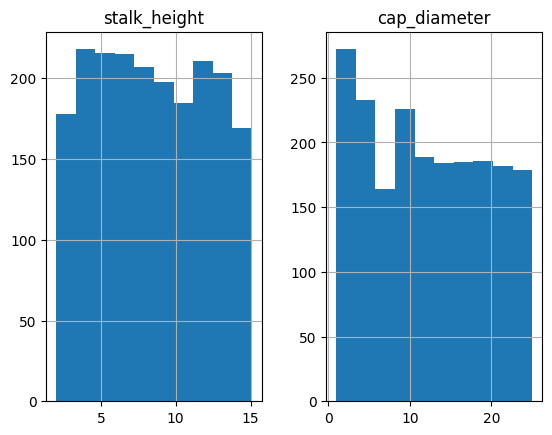

In [17]:
Features.hist() #plots histogram for numerical columns

<Axes: >

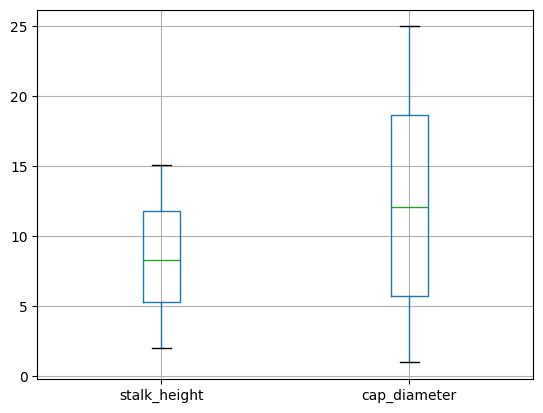

In [18]:
Features.boxplot() # Plots the boxplot for numerical columns

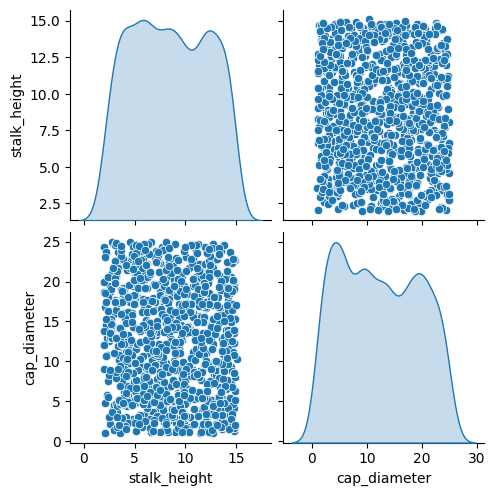

In [19]:
# Pair plot to visualize relationships between multiple features
sns.pairplot(Features, diag_kind='kde')
plt.show()

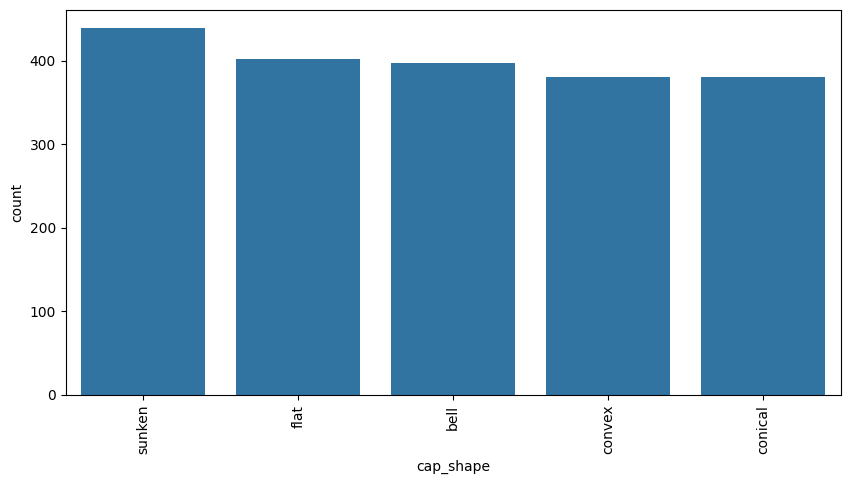

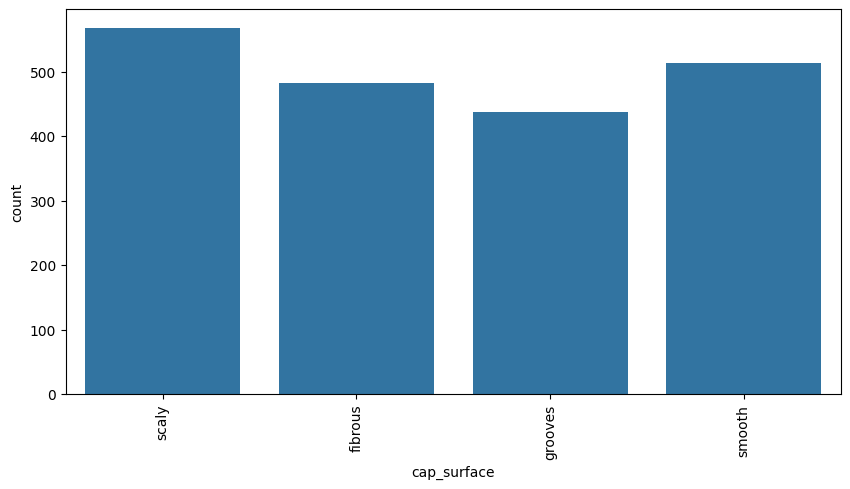

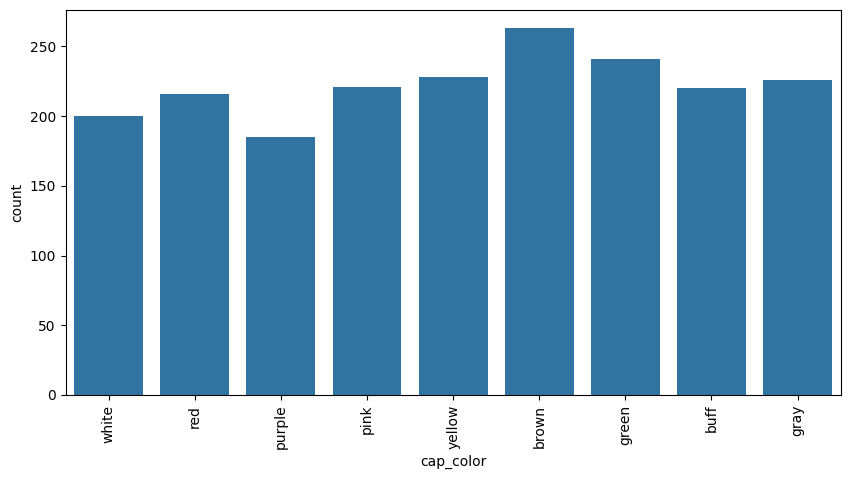

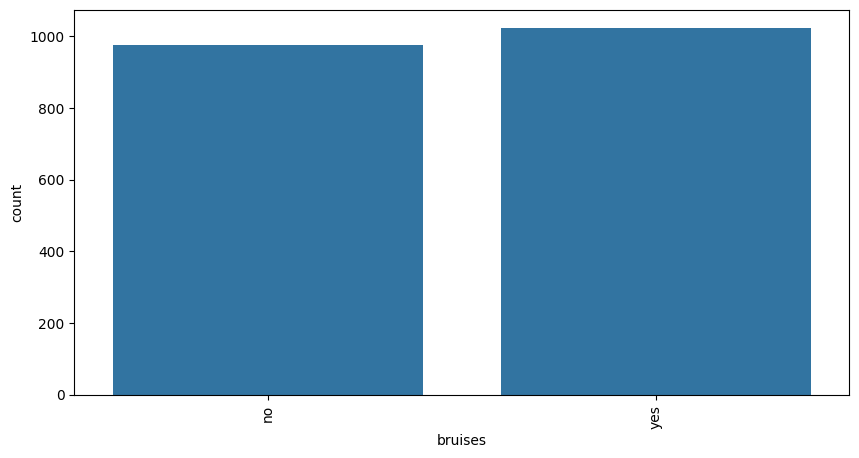

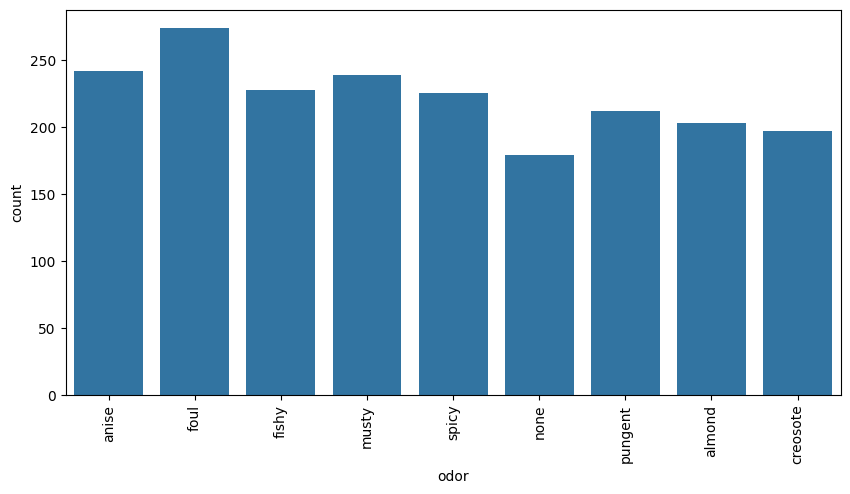

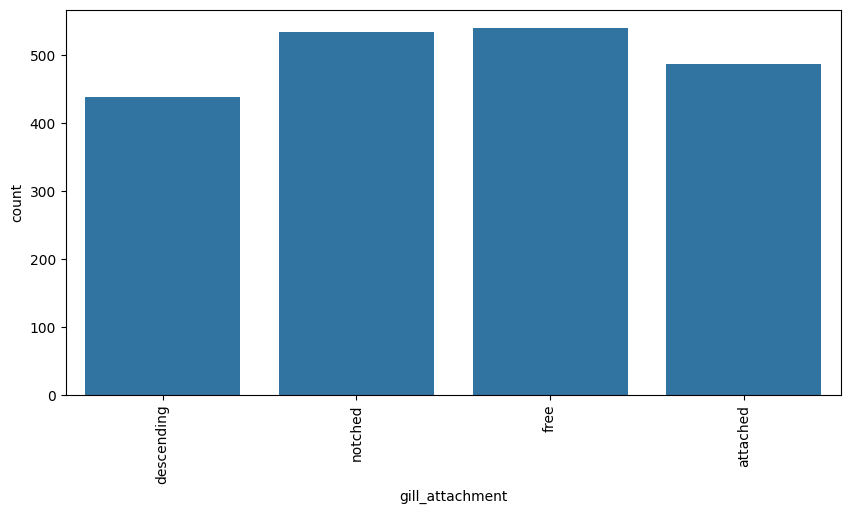

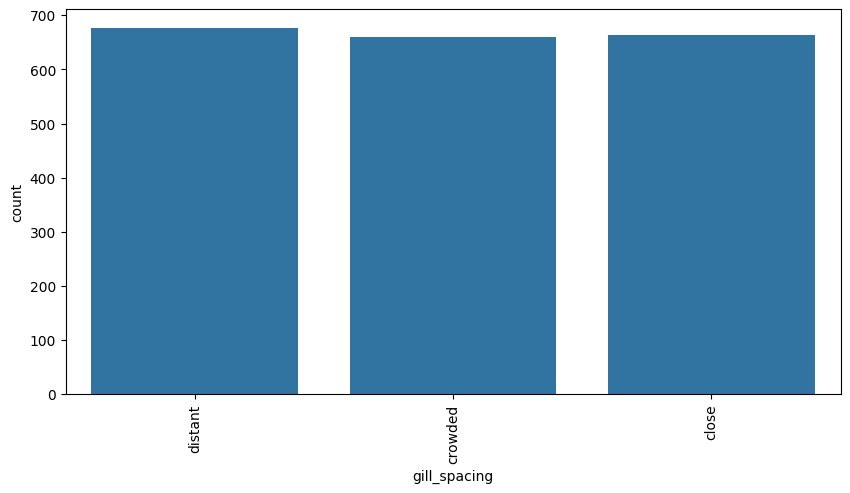

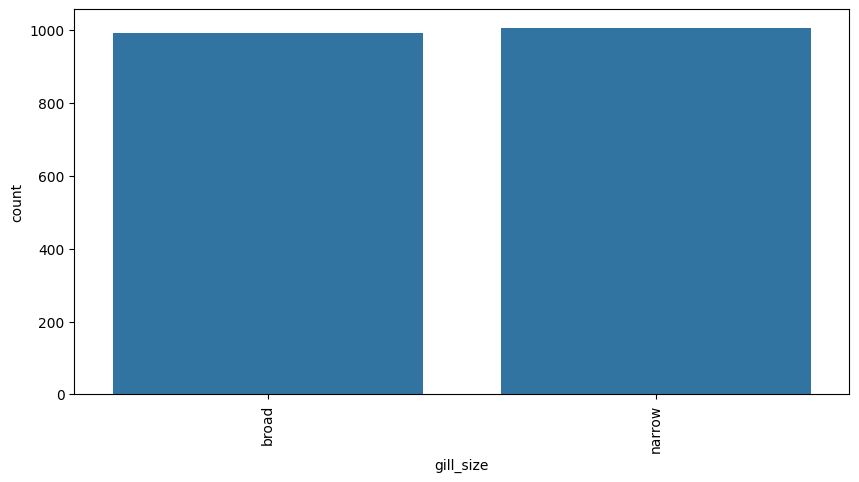

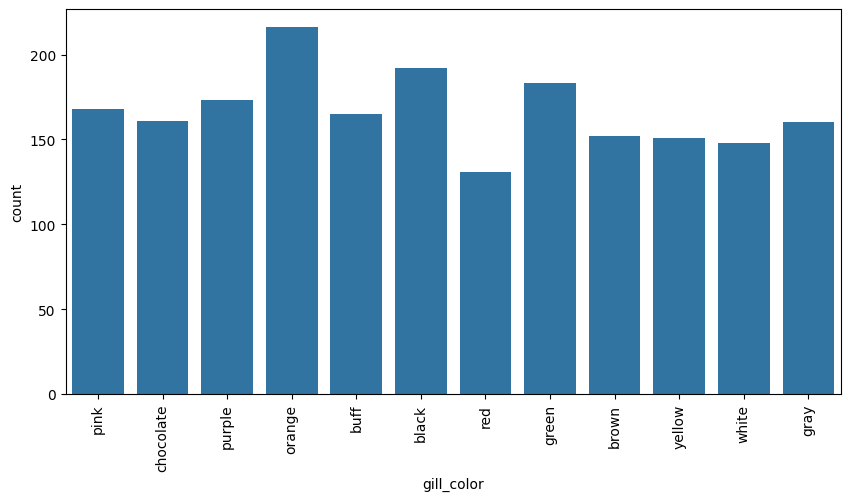

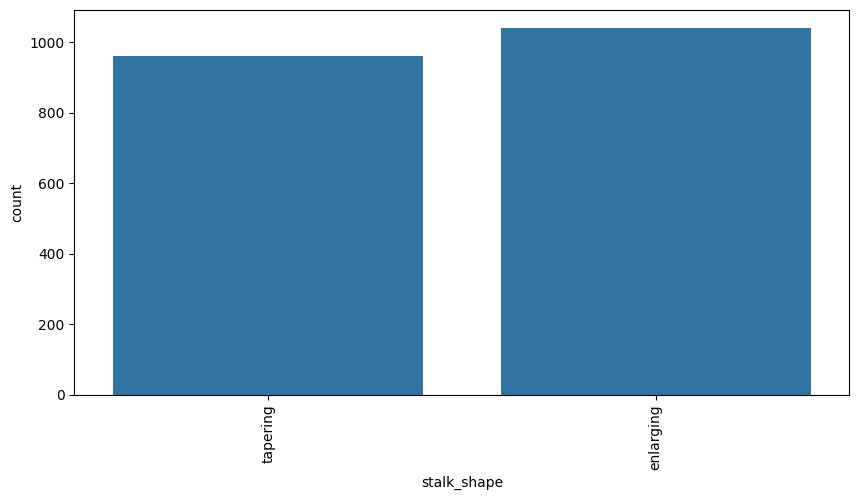

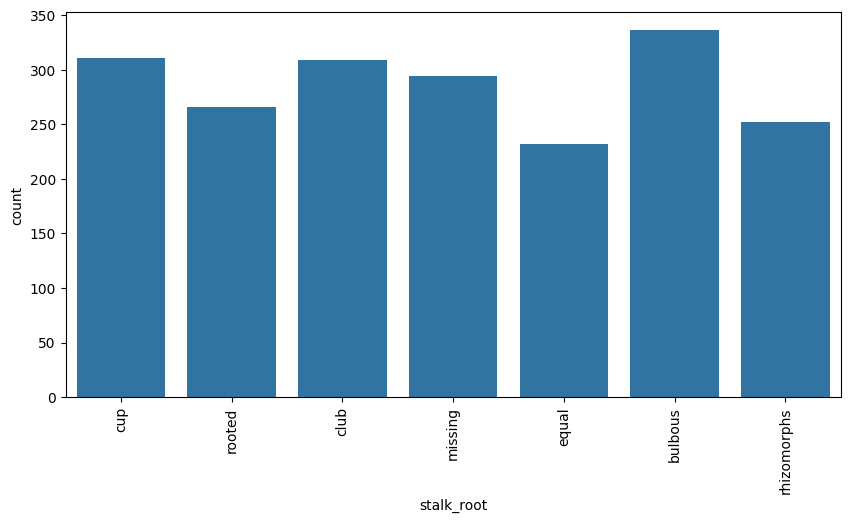

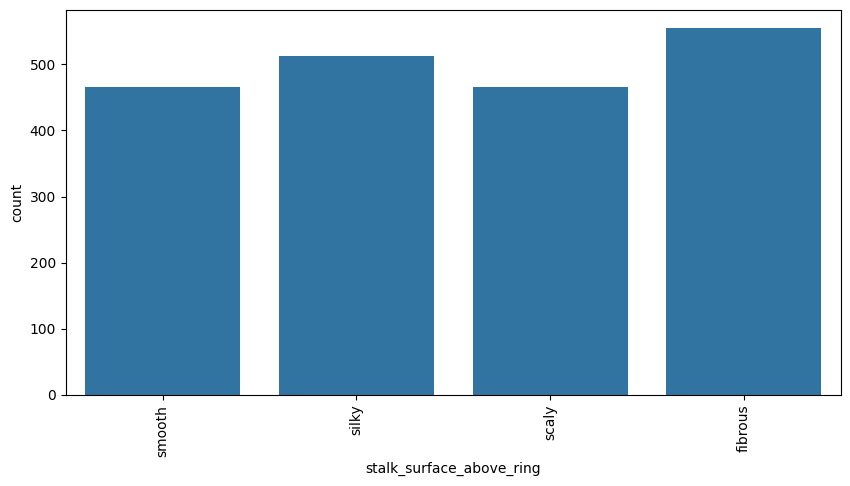

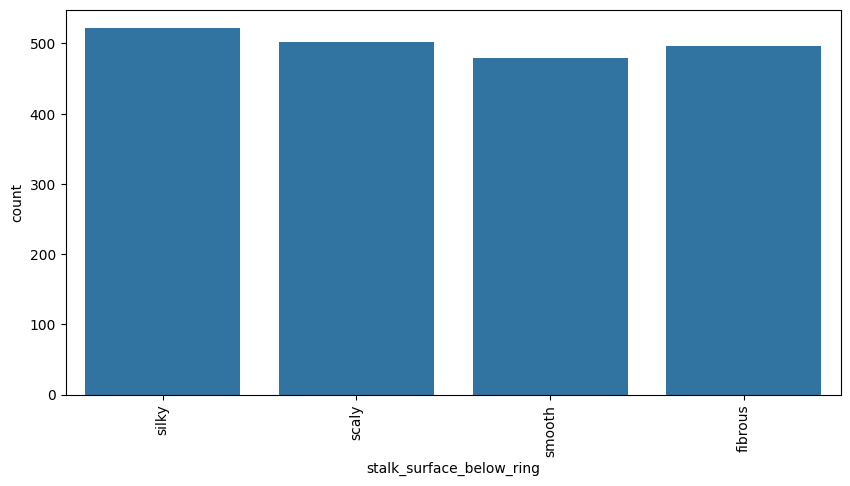

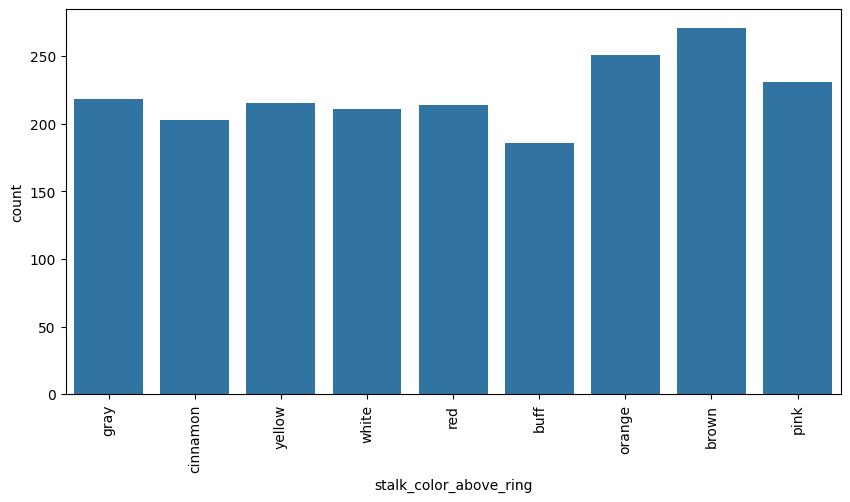

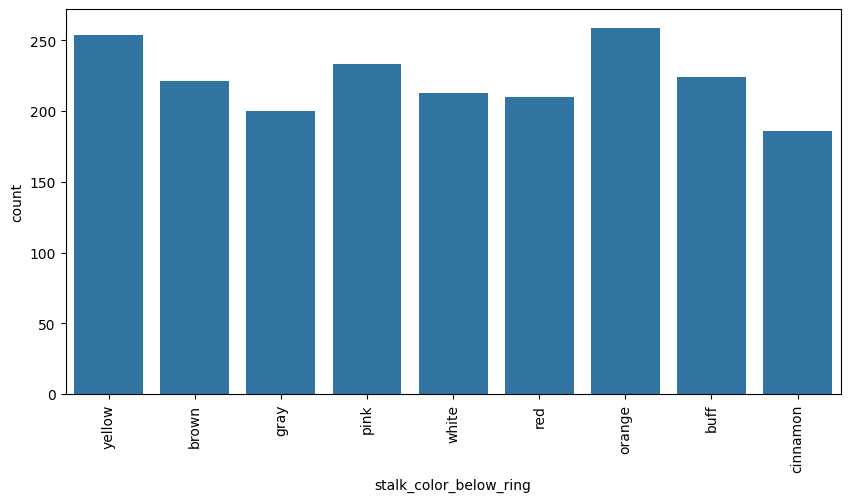

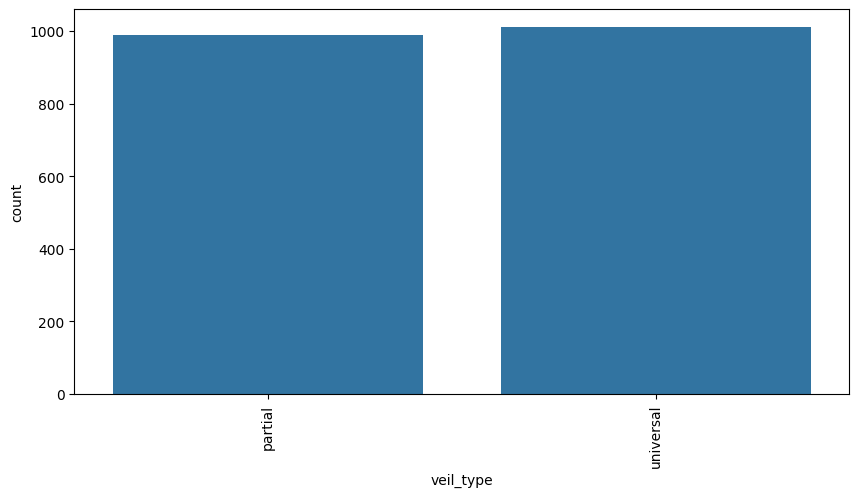

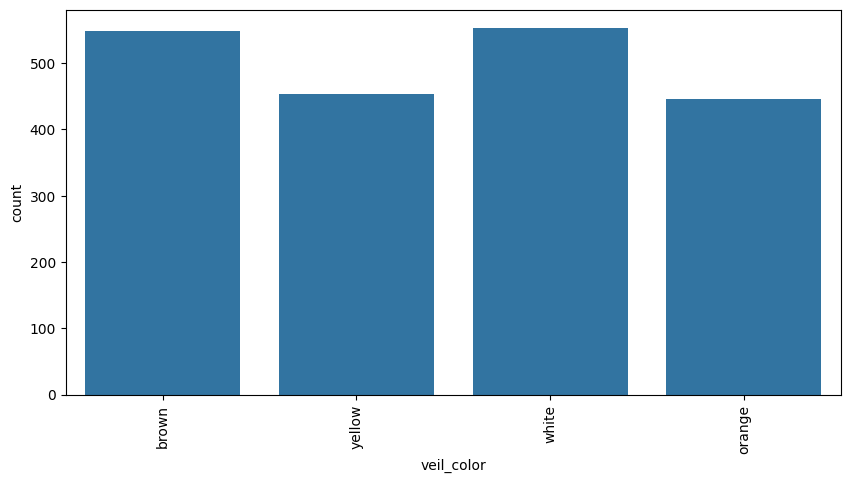

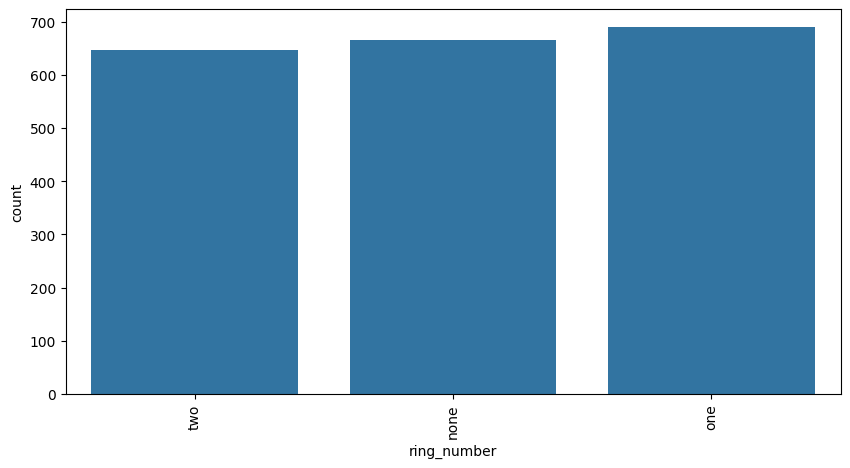

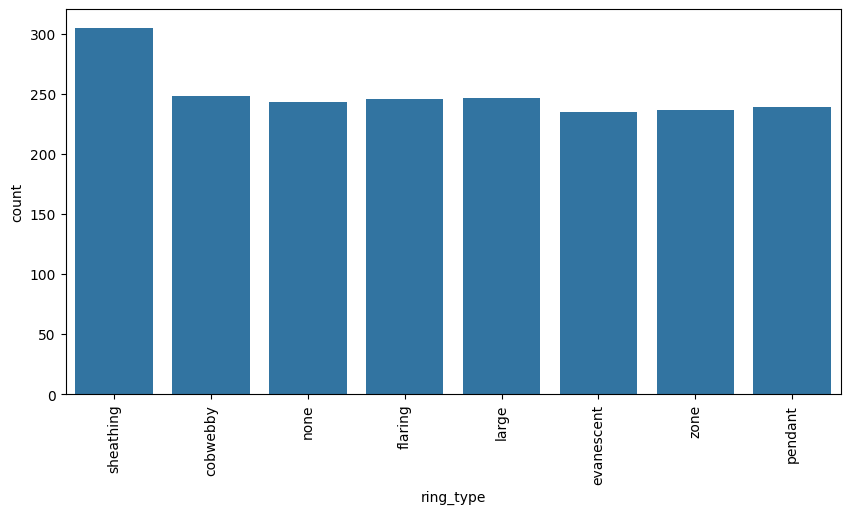

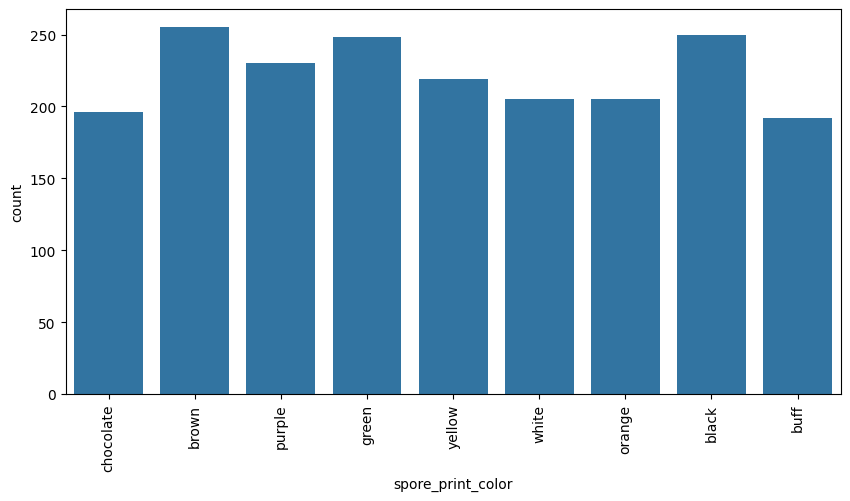

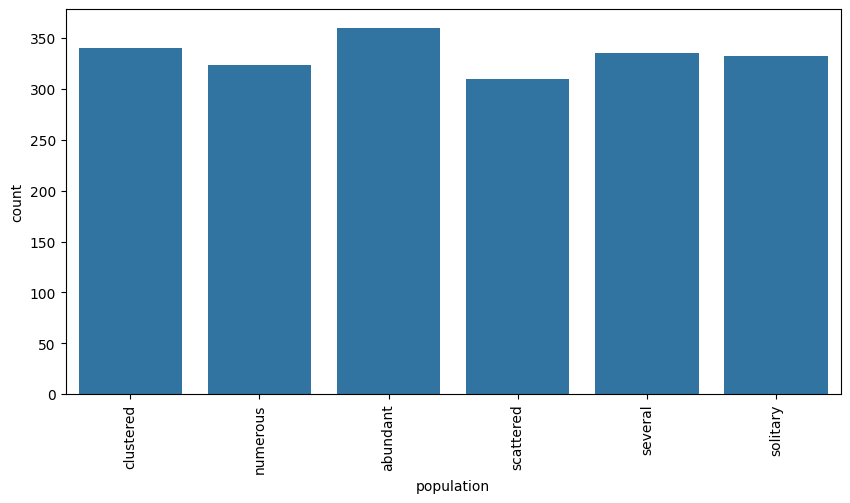

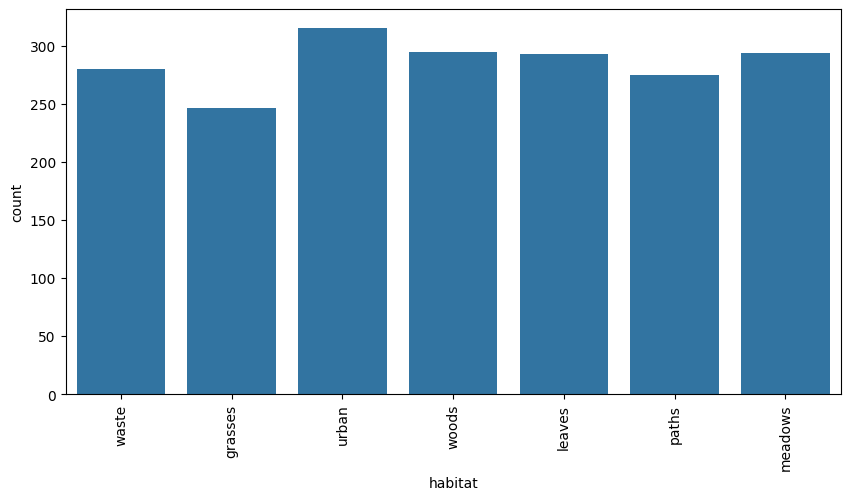

In [20]:
# Plots count plot for categorical columns
for i in cat_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=i, data=Features)
  plt.xticks(rotation=90)
  plt.show()

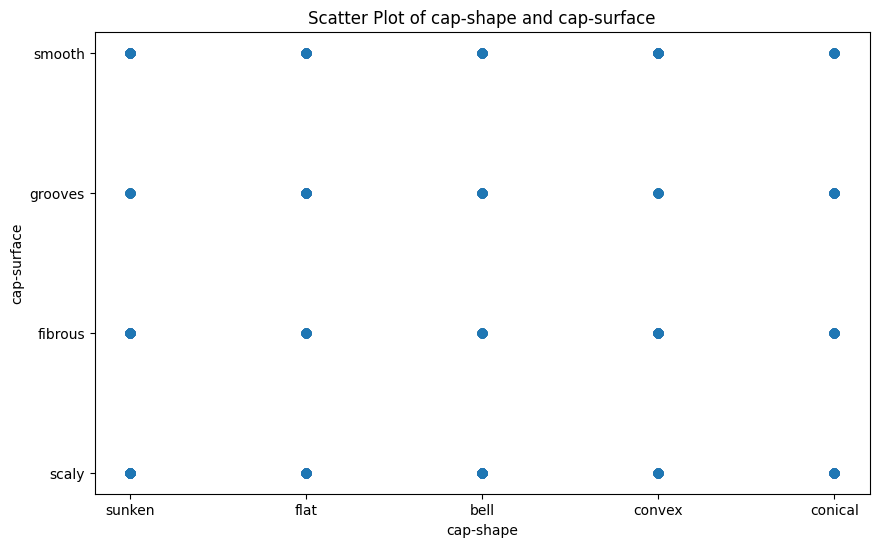

In [21]:
# Plots scatter plot for columns 'cap_shape' and 'cap_surface'
plt.figure(figsize=(10, 6))
plt.scatter(Features['cap_shape'], Features['cap_surface'])
plt.xlabel('cap-shape')
plt.ylabel('cap-surface')
plt.title('Scatter Plot of cap-shape and cap-surface')
plt.show()

In [22]:
std=StandardScaler() # Intialize Standard Scaler

In [23]:
Features[num_cols]=std.fit_transform(Features[num_cols]) # Fit the standard scaler for numerical columns

In [24]:
Features=pd.get_dummies(Features,columns=cat_cols,dtype=int) # Applying OneHot Encoding for categorical columns

In [25]:
Features

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.576459,-1.030123,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-1.216463,0.958407,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.163717,-0.724904,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.871852,1.222967,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.511897,0.032765,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.695623,0.730771,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1996,-0.527090,0.168525,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1997,1.382181,-0.148193,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1998,0.715199,-0.552164,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [26]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 126 entries, stalk_height to habitat_woods
dtypes: float64(2), int64(124)
memory usage: 1.9 MB


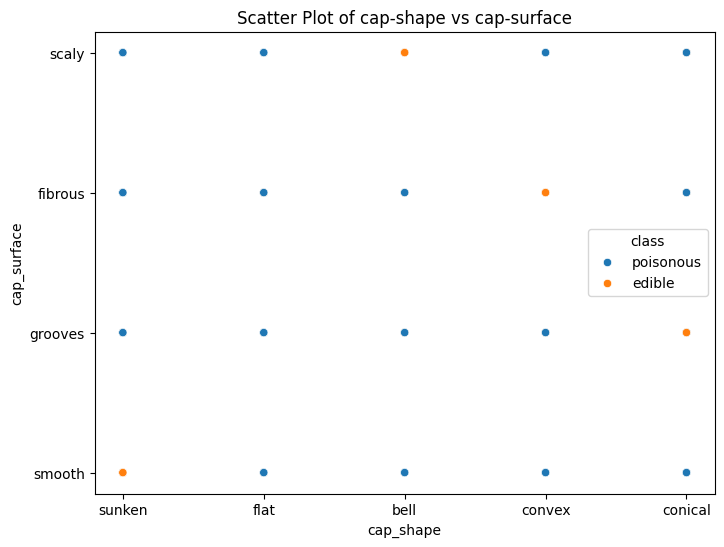

In [27]:
# Plots scatter plot for columns 'cap_shape' and 'cap_surface'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cap_shape', y='cap_surface', hue='class', data=df)
plt.title('Scatter Plot of cap-shape vs cap-surface')
plt.show()

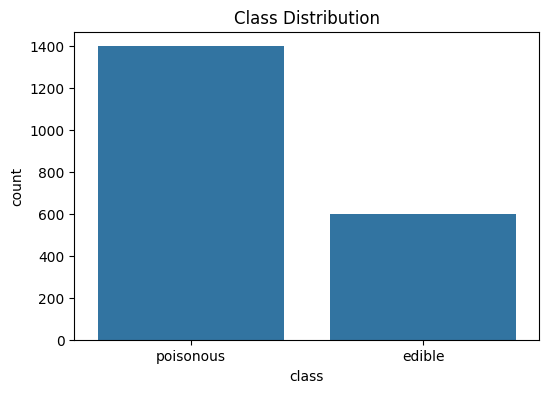

In [28]:
# Plots countplot for target variable 'target' column
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [29]:
# Splitting the training and testing data for model building
x_train,x_test,y_train,y_test=train_test_split(Features,Target,train_size=0.8,random_state=42)

In [30]:
print(x_train.shape) # Prints x_train shape
print(x_test.shape) # Prints x_test shape
print(y_train.shape) # Prints y_train shape
print(y_test.shape) # Prints y_test shape

(1600, 126)
(400, 126)
(1600,)
(400,)


In [31]:
svc=SVC(C=2.0,kernel='rbf',gamma=0.1) # SVC Model building

In [32]:
svc.fit(x_train,y_train) # Training the model on the training set

SVC(C=2.0, gamma=0.1)

In [33]:
y_pred=svc.predict(x_test) # Model Prediction on the test set

In [34]:
accuracy=accuracy_score(y_test,y_pred) # Accuracy variable

In [35]:
accuracy # Displays  the Accuracy score of the model

0.885

In [36]:
print(classification_report(y_test,y_pred)) # Prints Classification report

              precision    recall  f1-score   support

      edible       0.96      0.68      0.80       133
   poisonous       0.86      0.99      0.92       267

    accuracy                           0.89       400
   macro avg       0.91      0.83      0.86       400
weighted avg       0.89      0.89      0.88       400



In [37]:
cm=confusion_matrix(y_test,y_pred) # Confusion_matrix variable
cm

array([[ 91,  42],
       [  4, 263]])

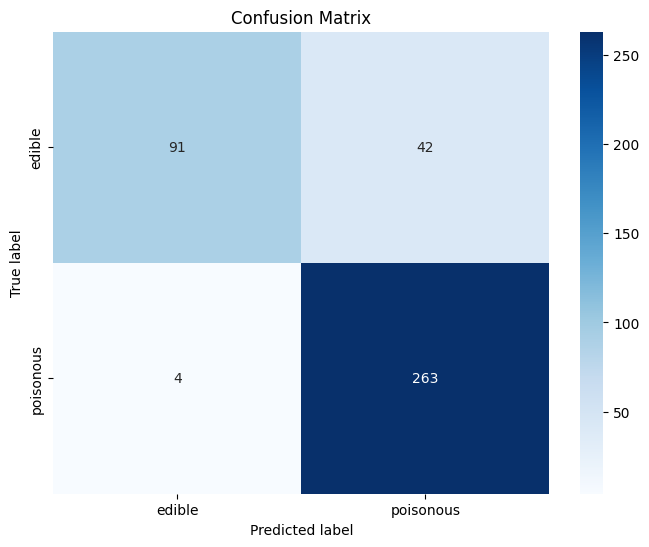

In [38]:
# Plots the heatmap for 'cm'
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
param_grid={'C':[1,2,3,4,5],'kernel':['poly','rbf','sigmoid','linear'],'gamma':[0.1,0,2,0.3,0.4,0.5]} # Parameters for grid search

In [40]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3) # GridSearchCV model

In [41]:
grid.fit(x_train,y_train) # Training the model

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.869 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.838 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.825 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.834 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.825 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.2s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.2s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.2s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.2s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.537 total time=   0.2s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'gamma': [0.1, 0, 2, 0.3, 0.4, 0.5],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             verbose=3)

In [42]:
grid.best_params_ # BestParameters

{'C': 1, 'gamma': 2, 'kernel': 'rbf'}

In [43]:
Best_model=grid.best_estimator_ # Best model

In [44]:
Best_model.fit(x_train,y_train) # Training the model with training data

SVC(C=1, gamma=2)

In [45]:
Best_y_pred=Best_model.predict(x_test) # Predicts 'Best_y_pred'

In [46]:
Best_accuracy=accuracy_score(y_test,Best_y_pred) # Accuracy score
Best_Classifcation_report=classification_report(y_test,Best_y_pred) # Classification report
Best_confusion_matrix=confusion_matrix(y_test,Best_y_pred) # Confusion matrix
print(Best_accuracy) # Prints accuracy score
print(Best_Classifcation_report) # Prints classification report
print(Best_confusion_matrix)   # Prints confusion matrix

0.885
              precision    recall  f1-score   support

      edible       1.00      0.65      0.79       133
   poisonous       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400

[[ 87  46]
 [  0 267]]


In [47]:
results = {}
for kernel in ['poly', 'rbf', 'sigmoid', 'linear']:
    model=SVC(kernel=kernel,C=grid.best_params_['C'],gamma=grid.best_params_['gamma'])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report=classification_report(y_test,y_pred)
    results[kernel] = {'accuracy': accuracy, 'report': report}
# Print the results
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report:\n{metrics['report']}\n")

Kernel: poly
Accuracy: 0.895
Classification Report:
              precision    recall  f1-score   support

      edible       0.93      0.74      0.82       133
   poisonous       0.88      0.97      0.93       267

    accuracy                           0.90       400
   macro avg       0.91      0.86      0.87       400
weighted avg       0.90      0.90      0.89       400


Kernel: rbf
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

      edible       1.00      0.65      0.79       133
   poisonous       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400


Kernel: sigmoid
Accuracy: 0.545
Classification Report:
              precision    recall  f1-score   support

      edible       0.29      0.26      0.28       133
   poisonous       0.65      0.69      0.67       267

    accuracy          

**Strengths:**

Effective for High-Dimensional Data:

The dataset has a mix of categorical and numerical features. After encoding, the dimensionality increases significantly, which SVM handles effectively by finding an optimal hyperplane in high-dimensional spaces.

Good for Binary Classification:

SVM excels at binary classification tasks, such as distinguishing between edible and poisonous mushrooms, as it focuses on maximizing the margin between classes.

Robust to Overfitting:

With proper tuning of parameters like the regularization term (C), SVM can handle imbalanced datasets and complex decision boundaries.

Kernel Trick:

Non-linear kernels can be applied if relationships between features are non-linear, though the linear kernel might suffice given the dataset's structure.


**Weaknesses:**

Computational Cost:

SVMs can be computationally expensive for large datasets like this (2000 samples) after one-hot encoding, as they scale poorly with the number of samples and features.

Hard to Interpret:

While SVM provides strong predictive performance, it does not directly offer feature importance or insights into the relationships between features and the target variable.

Sensitivity to Outliers:

Outliers in the numerical features (e.g., stalk_height, cap_diameter) may affect the hyperplane calculation unless mitigated with preprocessing.

Requires Preprocessing:

SVM models need all inputs to be numeric. Proper encoding and scaling are necessary, increasing preprocessing complexity.